<a href="https://colab.research.google.com/github/oilportrait/test_colab/blob/main/CLIPTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
"""Joshua K. Cage 저자 임선집 옮긴이의 101가지 문제로 배우는 딥러닝 허깅페이스 트랜스포머 with 파이토치(Python Transformers By Huggingface Hands On:)의 예제를 실행한 것임을 알립니다.
This code has been brought from the GitHub repository below and has been slightly modified.:https://github.com/jasonyim2/book3/blob/main/Transformers%2027-36.ipynb """
!pip install transformers
!pip install ftfy


In [5]:
## 새주석: 로컬에 존재하는 사진을 코랩 환경으로 가져오기
from google.colab import files
from PIL import Image
uploaded = files.upload()

filename = next(iter(uploaded))
image = Image.open(filename)

Saving Giraffe_and_zebra.jpg to Giraffe_and_zebra.jpg


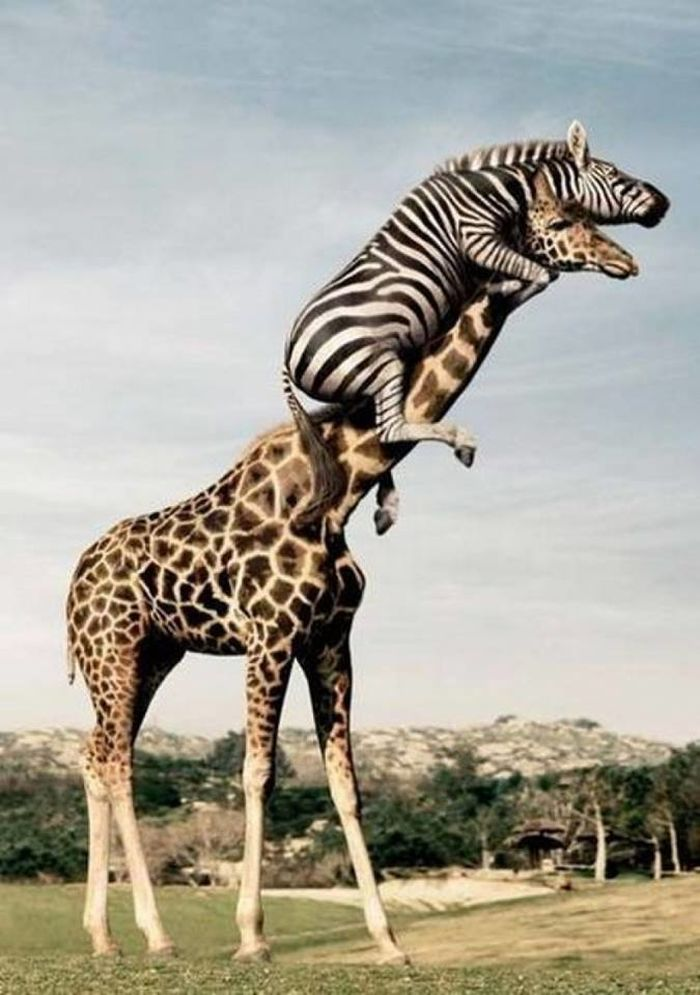

In [6]:
image

In [7]:
# 모델 및 프로세서 불러오기
## 새주석: .from_pretrained를 이용해서 원하는 이름의 모델을 트랜스포머 라이브러리에서 가져온다
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [8]:
## 새주석: 가지고 온 모델의 상세 스펙을 출력합니다
model

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e-05,

In [9]:
# 텍스트를 리스트 타입으로 입력
## 새주석: 이 텍스트는 사진이 분류될 케이스를 나누는것입니다.
candidates  = ["giraffe and zebra", "a zebra eating grass", "giraffe next to zebra", "zebra rides a giraffe","zebra on top of a giraffe"]

# 프로세서(ClIPPprocessor)에 텍스트 및 이미지를 입력하여 인코딩
## 새주석: 프로세서는 모델에 데이터를 넘겨주기 전에 전처리를 해줍니다
inputs = processor(text=candidates, images=image, return_tensors="pt", padding=True)

# inputs 출력
inputs

{'input_ids': tensor([[49406, 22826,   537, 22548, 49407, 49407, 49407, 49407],
        [49406,   320, 22548,  4371,  5922, 49407, 49407, 49407],
        [49406, 22826,  1131,   531, 22548, 49407, 49407, 49407],
        [49406, 22548, 11308,   320, 22826, 49407, 49407, 49407],
        [49406, 22548,   525,  1253,   539,   320, 22826, 49407]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 1.0982,  1.0982,  1.0982,  ...,  0.5727,  0.5727,  0.5873],
          [ 1.1128,  1.1128,  1.1128,  ...,  0.6019,  0.6019,  0.6019],
          [ 1.1128,  1.1128,  1.1128,  ...,  0.6165,  0.6165,  0.6165],
          ...,
          [-0.7850, -0.7996, -1.0769,  ..., -0.9310, -0.9893, -1.0477],
          [-0.5952, -0.5952, -0.5660,  ..., -1.0477, -1.1207, -1.2229],
          [-0.4784, -0.3908, -0.4200,  ..., -1.0623, -1.1645, -1.3105]],


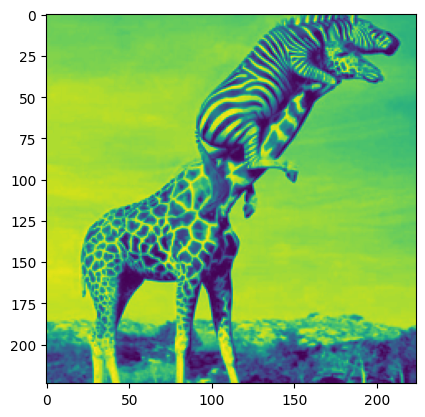

In [10]:
# 인코딩한 이미지 출력
## 새주석: .imshow는 프로세스를 거쳐서 나온 이미지 텐서를 그려주는 역할을 합니다.
## 새주석: ['pixel_values']는 불러올 키값을 뜻하고 [0][0]에서 첫번째 0은 순서상 처음 이미지를 불러온다는 의미이며 두번쨰 0은 rgb의 r을 의미합니다.
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][0]);

In [11]:
# inputs['pixel_values'] 차원 확인
## 새주석:(1, 3, 224, 224)을 각각 설명하면 1은 배치 사이즈이며 3은 색깔채널인 rgb를 표현합니다. 224는 이미지의 사이즈를 나타냅니다.
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

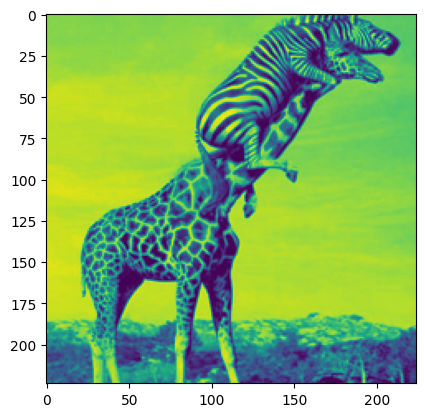

In [12]:
# 인코딩한 이미지 출력. 인덱스를 [0][1]로 변경
## 새주석: 이번에는 기존과는 다르게 펏번쨰 이미지 rgb의 g부분을 출력합니다.
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0][1]);

In [13]:
# 인코딩된 텍스트 출력
## 새주석:input_ids는 입력에서 텍스트를 어떻게 토큰화 시켰는지 알려줍니다.
inputs['input_ids'][0]

tensor([49406, 22826,   537, 22548, 49407, 49407, 49407, 49407])

In [14]:
# 위의 결과를 디코딩한 텍스트 출력
## 새주석: 위에서 토큰화 시킨 텐서를 그대로 디코딩함으로서 어떤 텍스트를 넣었는지 확인합니다.
processor.tokenizer.decode(inputs['input_ids'][0])

'<|startoftext|>giraffe and zebra <|endoftext|><|endoftext|><|endoftext|><|endoftext|>'

In [15]:
# 모델을 eval 모드로 전환
model.eval()

# **inputs에서의 ** 표시는 inputs 변수가 키(key)와 값(value)로 이루어져 있을 때
# input 변수에 담긴 키와 값을 모두 모델에 입력하는 용도임
outputs = model(**inputs)

# 출력물 outputs의 키(key) 출력
## 새주석:logits_per_image는 모든 텍스트 프롬프트와 이미지가 얼마자 잘 일치되는지에 대한 점수를 측정한것입니다
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [16]:
## 새주석: 곧바로 분류를 위해서 필요한 키값인 logits_per_image를 가져옵니다.
logits_per_image = outputs.logits_per_image
print(logits_per_image)

tensor([[31.0530, 25.4633, 30.3237, 32.5923, 32.2320]], grad_fn=<TBackward0>)


In [17]:
# logits_per_image에 담긴 값을 입력값 행별로(dim=1) 소프트맥스 함수에 투입
## 새주석: 각 텍스트 프롬프트와 이미지의 유사성을 확률로서 산출하기 위한 소프트 맥스입니다.
probs = logits_per_image.softmax(dim=1)

import torch

# 변수 probs에 담긴 값 중에 최고값의 인덱스를 argmax로 찾고
# item()을 통해 레이블 즉 제목을 출력
# 그 결과가 cadidates의 인덱스 값이 됨
print(candidates[torch.argmax(probs).item()])

zebra rides a giraffe
